In [36]:
from PIL import Image

In [37]:
import depth_pro

In [38]:
import torch

def get_torch_device() -> torch.device:
    """Get the Torch device."""
    device = torch.device("cpu")
    if torch.cuda.is_available():
        device = torch.device("cuda:0")
    elif torch.backends.mps.is_available():
        device = torch.device("mps")
    return device

print("Torch device:", get_torch_device())

Torch device: mps


In [39]:
# Load model and preprocessing transform
model, transform = depth_pro.create_model_and_transforms(
        device=get_torch_device(),
        precision=torch.half,
    )
model.eval()

DepthPro(
  (encoder): DepthProEncoder(
    (patch_encoder): VisionTransformer(
      (patch_embed): PatchEmbed(
        (proj): Conv2d(3, 1024, kernel_size=(16, 16), stride=(16, 16))
        (norm): Identity()
      )
      (pos_drop): Dropout(p=0.0, inplace=False)
      (patch_drop): Identity()
      (norm_pre): Identity()
      (blocks): Sequential(
        (0): Block(
          (norm1): LayerNorm((1024,), eps=1e-06, elementwise_affine=True)
          (attn): Attention(
            (qkv): Linear(in_features=1024, out_features=3072, bias=True)
            (q_norm): Identity()
            (k_norm): Identity()
            (attn_drop): Dropout(p=0.0, inplace=False)
            (proj): Linear(in_features=1024, out_features=1024, bias=True)
            (proj_drop): Dropout(p=0.0, inplace=False)
          )
          (ls1): LayerScale()
          (drop_path1): Identity()
          (norm2): LayerNorm((1024,), eps=1e-06, elementwise_affine=True)
          (mlp): Mlp(
            (fc1): Linea

In [ ]:
# Load and preprocess an image.
image_file = "../images/forest-0.jpg"
image, _, f_px = depth_pro.load_rgb(image_file)
image = transform(image)

# Run inference.
prediction = model.infer(image, f_px=f_px)
depth = prediction["depth"]  # Depth in [m].
focallength_px = prediction["focallength_px"]  # Focal length in pixels.

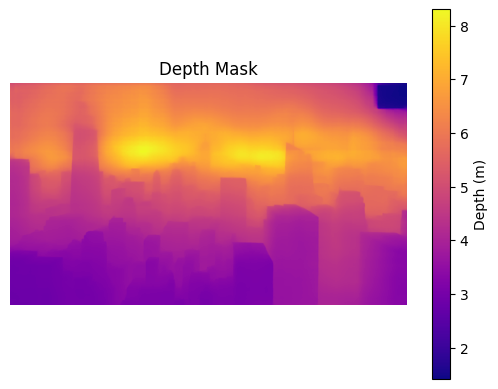

Focal length (px): 607.22


In [41]:
import matplotlib.pyplot as plt

# Display the depth mask
plt.imshow(prediction["depth"].cpu().numpy(), cmap='plasma')
plt.title("Depth Mask")
plt.colorbar(label="Depth (m)")
plt.axis('off')
plt.show()

# Display the focal length
print(f"Focal length (px): {prediction['focallength_px'].item():.2f}")

In [42]:
import numpy as np
import os
# Save the depth mask and focal length to a numpy file
image_name = os.path.splitext(os.path.basename(image_file))[0]
filename = f"../images/{image_name}_depth_and_focal.npz"
np.savez(filename, depth=prediction["depth"].cpu().numpy(), focallength_px=prediction["focallength_px"].item())